In [67]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

from config.config import NASA_API_KEY

In [8]:
url = "https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key="+NASA_API_KEY 
url = url.replace(" ", "%20")

In [11]:
response = requests.get(url).json()
response

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-08&end_date=2015-09-09&detailed=false&api_key=2TDDo2a0Oq3vhCyhliiJmGu2M957SJh7aEHlEYo6',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-06&end_date=2015-09-07&detailed=false&api_key=2TDDo2a0Oq3vhCyhliiJmGu2M957SJh7aEHlEYo6',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&detailed=false&api_key=2TDDo2a0Oq3vhCyhliiJmGu2M957SJh7aEHlEYo6'},
 'element_count': 26,
 'near_earth_objects': {'2015-09-08': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2465633?api_key=2TDDo2a0Oq3vhCyhliiJmGu2M957SJh7aEHlEYo6'},
    'id': '2465633',
    'neo_reference_id': '2465633',
    'name': '465633 (2009 JR5)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2465633',
    'absolute_magnitude_h': 20.44,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.2170475943,
      'estimated_diameter_max': 0.4853331752},
  

In [16]:
#Asteroids NeoWs — NeoWs (Near Earth Object Web Service)
#The Feed date limit is only 7 Days
start_date ="2023-10-30"
end_date = "2023-11-05"

In [17]:
url_nov = "https://api.nasa.gov/neo/rest/v1/feed?start_date="+ start_date+"&end_date="+ end_date+"&api_key="+NASA_API_KEY 
url_nov = url_nov.replace(" ", "%20")

In [18]:
response_nov = requests.get(url_nov).json()
response_nov

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-11-05&end_date=2023-11-11&detailed=false&api_key=2TDDo2a0Oq3vhCyhliiJmGu2M957SJh7aEHlEYo6',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-10-24&end_date=2023-10-30&detailed=false&api_key=2TDDo2a0Oq3vhCyhliiJmGu2M957SJh7aEHlEYo6',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-10-30&end_date=2023-11-05&detailed=false&api_key=2TDDo2a0Oq3vhCyhliiJmGu2M957SJh7aEHlEYo6'},
 'element_count': 148,
 'near_earth_objects': {'2023-10-30': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2164294?api_key=2TDDo2a0Oq3vhCyhliiJmGu2M957SJh7aEHlEYo6'},
    'id': '2164294',
    'neo_reference_id': '2164294',
    'name': '164294 (2004 XZ130)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2164294',
    'absolute_magnitude_h': 20.45,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.2160503512,
      'estimated_diameter_max': 0.4831032718},

In [65]:
df = pd.DataFrame(columns=['id', 'name', 'date', 'estimated_diameter_km_min', 'estimated_diameter_km_max', 'close_approach_date', 'relative_velocity_km_per_hour'])

for date, object_lists in response_nov['near_earth_objects'].items():
    for object_list in object_lists:
        id_value = object_list['id']
        name_value = object_list['name']

        
        estimated_diameter_data = object_list['estimated_diameter']['kilometers']
        estimated_diameter_km_min = estimated_diameter_data['estimated_diameter_min']
        estimated_diameter_km_max = estimated_diameter_data['estimated_diameter_max']

        
        for close_approach_data in object_list['close_approach_data']:
            close_approach_date_value = close_approach_data['close_approach_date']
            relative_velocity_km_per_hour = close_approach_data['relative_velocity']['kilometers_per_hour']
            
           
            df = pd.concat([df, pd.DataFrame({
                'id': [id_value],
                'name': [name_value],
                'date': [date],
                'estimated_diameter_km_min': [estimated_diameter_km_min],
                'estimated_diameter_km_max': [estimated_diameter_km_max],
                'close_approach_date': [close_approach_date_value],
                'relative_velocity_km_per_hour': [relative_velocity_km_per_hour]
            })], ignore_index=True)

        #print(f"Date: {date}\tID: {id}\tName: {name}\tClose Approach Date: {close_approach_date}\tRelative Velocity: {relative_velocity}")
  


C:\Users\Fydil35\AppData\Local\Temp\ipykernel_1992\3211945012.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({


In [66]:
df

,id,name,date,estimated_diameter_km_min,estimated_diameter_km_max,close_approach_date,relative_velocity_km_per_hour
0,2164294,164294 (2004 XZ130),2023-10-30,0.216050,0.483103,2023-10-30,58361.9606467744
1,2525229,525229 (2004 UU1),2023-10-30,0.154367,0.345176,2023-10-30,62739.4862545571
2,3092138,(1995 FO),2023-10-30,0.170042,0.380224,2023-10-30,18816.9794164543
3,3262569,(2004 WC1),2023-10-30,0.016016,0.035813,2023-10-30,36641.9842107707
4,3408583,(2008 GP3),2023-10-30,0.023150,0.051765,2023-10-30,66274.164434092
...,...,...,...,...,...,...,...
143,54403399,(2023 VQ3),2023-11-05,0.034559,0.077275,2023-11-05,34240.0150484663
144,54403816,(2023 VZ4),2023-11-05,0.030378,0.067927,2023-11-05,86223.796561156
145,54404084,(2023 VN5),2023-11-05,0.007187,0.016071,2023-11-05,49815.3600643205
146,54404390,(2023 VD7),2023-11-05,0.035201,0.078712,2023-11-05,56406.8120503561


In [81]:
df.info(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             148 non-null    object 
 1   name                           148 non-null    object 
 2   date                           148 non-null    object 
 3   estimated_diameter_km_min      148 non-null    float64
 4   estimated_diameter_km_max      148 non-null    float64
 5   close_approach_date            148 non-null    object 
 6   relative_velocity_km_per_hour  148 non-null    object 
dtypes: float64(2), object(5)
memory usage: 8.2+ KB


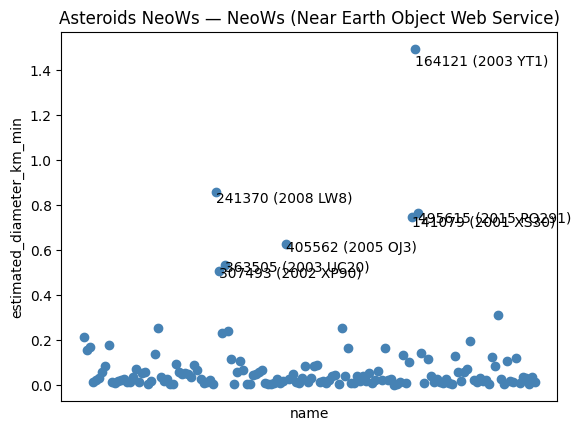

In [84]:
# Label outliers
plt.title('Asteroids NeoWs — NeoWs (Near Earth Object Web Service)')
plt.ylabel('estimated_diameter_km_min')
plt.xlabel('name')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

for i in range(len(df)):
    y = df['estimated_diameter_km_min'][i]
    x = df['name'][i]
    plt.plot(x, y, "o", color="steelblue")
    
    if df['estimated_diameter_km_min'][i] > (0.4):
        plt.text(x, y * (1 - 0.05), df['name'][i], fontsize=10,)
    
plt.show()

In [ ]:
#Browse the overall Asteroid data-set 
url_astroids = "https://api.nasa.gov/neo/rest/v1/neo/browse?api_key="+NASA_API_KEY